In [15]:
import pandas as pd
import sklearn
import seaborn as sea
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,4
import warnings
warnings.filterwarnings('ignore')

In [16]:
house_prices_train = pd.read_csv('train.csv')
house_prices_test = pd.read_csv('test.csv')
house_prices_train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [17]:
house_prices_all = pd.concat((house_prices_train.loc[:,'MSSubClass': 'SaleCondition'],
                             house_prices_test.loc[:,'MSSubClass': 'SaleCondition']))
house_prices_all.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal


In [18]:
house_prices_train.shape, house_prices_test.shape, house_prices_all.shape

((1460, 81), (1459, 80), (2919, 79))

In [19]:
pd.options.display.max_rows = 100
house_prices_all.get_dtype_counts

<bound method NDFrame.get_dtype_counts of       MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
5             50       RL         85.0    14115   Pave   NaN      IR1   
6             20       RL         75.0    10084   Pave   NaN      Reg   
7             60       RL          NaN    10382   Pave   NaN      IR1   
8             50       RM         51.0     6120   Pave   NaN      Reg   
9            190       RL         50.0     7420   Pave   NaN      Reg   
10            20       RL         70.0    11200   Pave   NaN      Reg   
11            60       RL         85.0    11924   Pave   NaN      IR1   
12       

# Exploratory Data Analysis

### Summary statistics

In [20]:
house_prices_all.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


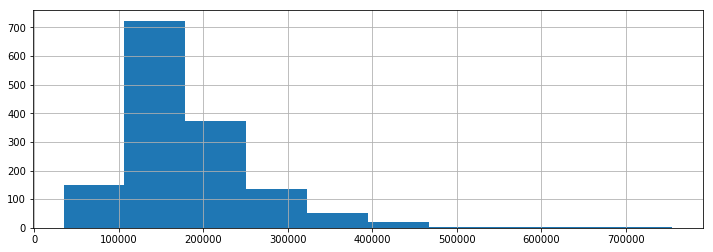

In [21]:
plot = house_prices_train['SalePrice'].hist()

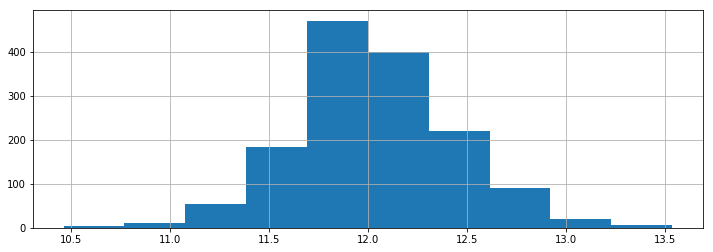

In [10]:
plot = house_prices_train['SalePrice'].apply(lambda x: np.log1p(x)).hist()

In [22]:
print (stats.skew(house_prices_train['SalePrice']))
print (stats.skew(house_prices_train['SalePrice'].apply(lambda x: np.log1p(x))))

1.880940746034036
0.12122191311528359


#### Since the output variable is skewed, lets log transform it so it is closer to normal distribution.

In [25]:
house_prices_train['log_SalePrice'] = house_prices_train['SalePrice'].apply(lambda x: np.log1p(x))
house_prices_train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,log_SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,12.109016


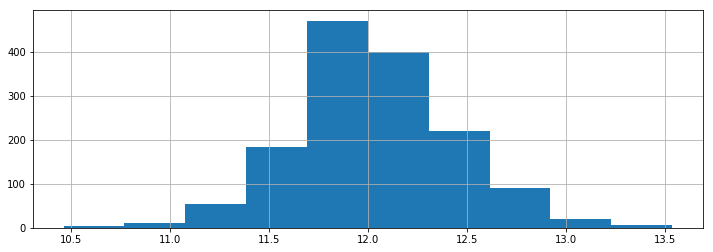

In [30]:
plot = house_prices_train['log_SalePrice'].hist() # Looks substantially more normal
#plot = sea.boxplot(house_prices_train['log_SalePrice'])

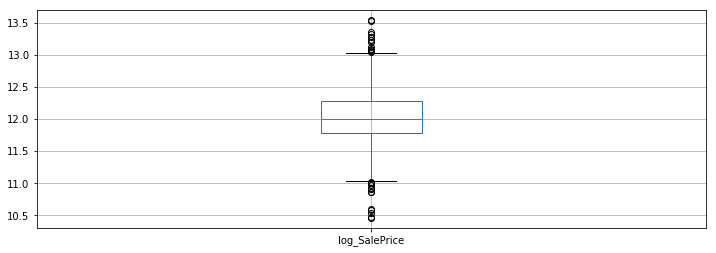

In [31]:
plot = house_prices_train.boxplot(column='log_SalePrice')

#### Replace NaNs with means of the columns

In [32]:
house_prices_all = house_prices_all.fillna(house_prices_all.mean())

#### Determine what features are skewed and log transform them if necessary

In [35]:
numerical_features = house_prices_all.columns[house_prices_all.dtypes != 'object']
stats.skew(house_prices_all[numerical_features])

array([  1.37545736,   1.64557379,  12.8224314 ,   0.19711045,
         0.57031205,  -0.59980555,  -0.45102038,   2.61154938,
         1.42523344,   4.14603364,   0.91950831,   1.16248375,
         1.46960442,   0.86167475,  12.088761  ,   1.26935769,
         0.62395504,   3.93134301,   0.16760573,   0.69456649,
         0.32632435,   4.30225437,   0.75836691,   0.7334946 ,
        -0.39279   ,  -0.21829789,   0.24121778,   1.84243281,
         2.53511373,   4.00389122,  11.37606468,   3.9466937 ,
        16.89832792,  21.94719481,   0.19588394,   0.13239881])

In [ ]:
skewed_features = house_prices_all[numerical_features].columns[np.absolute(stats.skew(house_prices
_all[numerical_features]))>.8]